# Visualizing Relationships of random variables

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context('talk')

In [9]:
url = '../data/sysarmy_survey_2020_processed.csv'

# Or we can use this other URL if we are in google colab and we want to read the dataset directly from a server.
# url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'

df = pd.read_csv(url)

In [10]:
df.head(3)

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,salary_has_bonus,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies
0,Female,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,University,Ongoing,...,No,No,0.0,0,In my current job,NaN,501-1000,Services / Software Consulting / Digital,7,2
1,Male,29,Argentina,Corrientes,5.0,2.0,2.0,4,University,Ongoing,...,Less than a salary,One,10.0,1,Never,No,201-500,Other industries,8,9
2,Female,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secondary,Complete,...,One salary,No,0.0,0,In a previous job,No,2001-5000,Other industries,6,9


## Numerical random variables

Machine learning algorithms strongly depend on providing correlated information of your input with the output, and removing duplicated information, that is, data that is correlated. 

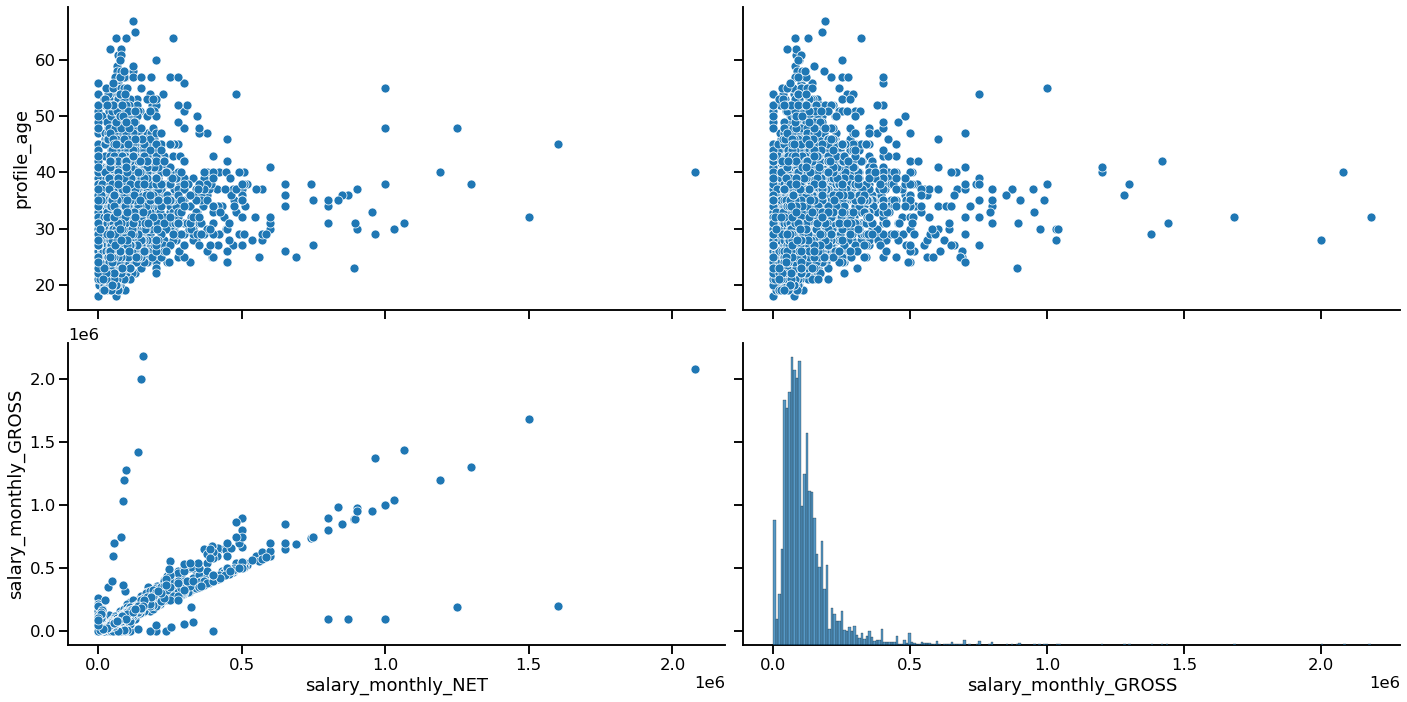

In [11]:
max_age = 99
sns.pairplot(data=df[df.profile_age < max_age],
             y_vars=['profile_age', 'salary_monthly_GROSS'],
             x_vars=['salary_monthly_NET', 'salary_monthly_GROSS'],
             aspect=2, height=5)

In [12]:
df[["salary_monthly_NET", "salary_monthly_GROSS"]].corr()

,salary_monthly_NET,salary_monthly_GROSS
salary_monthly_NET,1.000000,0.833335
salary_monthly_GROSS,0.833335,1.000000


In [13]:
df[["profile_age", "salary_monthly_GROSS"]].corr()

,profile_age,salary_monthly_GROSS
profile_age,1.000000,-0.006752
salary_monthly_GROSS,-0.006752,1.000000


## Categorical Random Variables

In [14]:
sorted_studies_levels = ["Primary", "Secondary", "Terciary", "University", "Postgraduate", "Doctorate", "Postdoc"]
pd.crosstab(df.profile_gender, df.profile_studies_level, margins=True)[sorted_studies_levels + ["All"]]

profile_studies_level,Primary,Secondary,Terciary,University,Postgraduate,Doctorate,Postdoc,All
profile_gender,,,,,,,,
Female,0,24,158,667,85,8,0,942
Male,2,424,970,3447,256,19,4,5122
Other,0,1,7,19,1,3,0,31
All,2,449,1135,4133,342,30,4,6095


<AxesSubplot:xlabel='profile_studies_level', ylabel='profile_gender'>

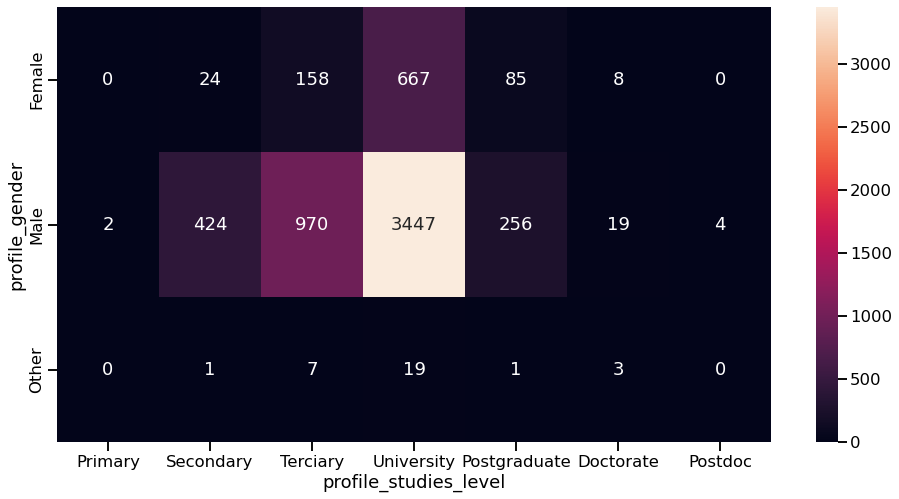

In [15]:
fig = plt.figure(figsize=(16, 8))
exp = pd.crosstab(df.profile_gender,
                  df.profile_studies_level)[sorted_studies_levels]
sns.heatmap(exp, annot=True, fmt='g')

In [16]:
pd.crosstab(df.profile_gender, df.profile_studies_level, normalize=True, margins=True)[sorted_studies_levels + ["All"]]

profile_studies_level,Primary,Secondary,Terciary,University,Postgraduate,Doctorate,Postdoc,All
profile_gender,,,,,,,,
Female,0.000000,0.003938,0.025923,0.109434,0.013946,0.001313,0.000000,0.154553
Male,0.000328,0.069565,0.159147,0.565546,0.042002,0.003117,0.000656,0.840361
Other,0.000000,0.000164,0.001148,0.003117,0.000164,0.000492,0.000000,0.005086
All,0.000328,0.073667,0.186218,0.678097,0.056112,0.004922,0.000656,1.000000


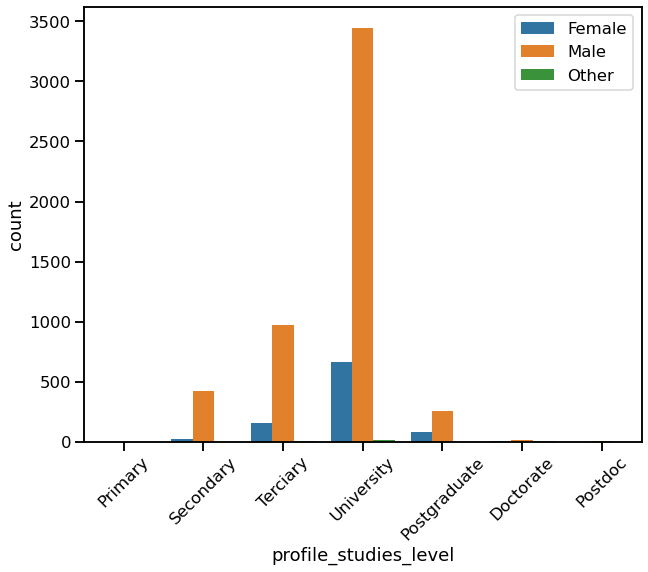

In [17]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data=df, x="profile_studies_level", hue=df.profile_gender, order=sorted_studies_levels)
plt.xticks(rotation=45)
plt.legend(loc='upper right')

## Mixing categorical and numerical variables

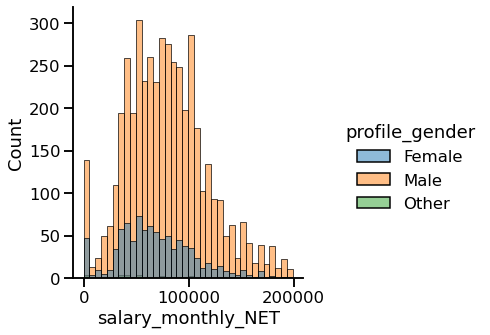

In [18]:
df_lt_200k_salary = df[df["salary_monthly_NET"] < 200000]

sns.displot(data=df_lt_200k_salary, x="salary_monthly_NET", hue="profile_gender")

<AxesSubplot:xlabel='salary_satisfaction', ylabel='salary_monthly_NET'>

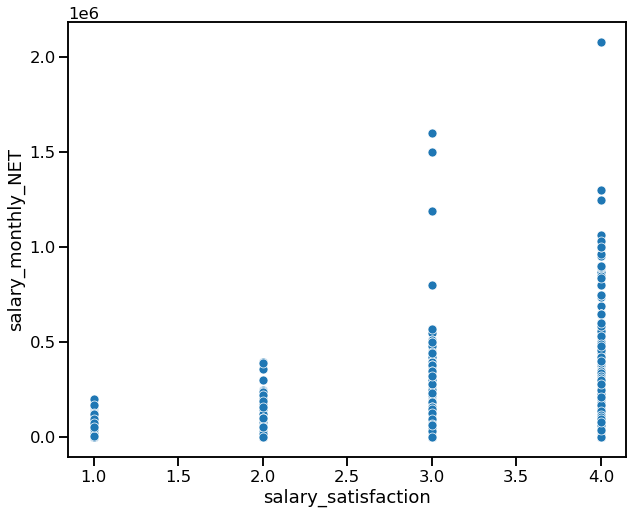

In [19]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df[df.profile_age < max_age],
                y='salary_monthly_NET',
                x='salary_satisfaction')

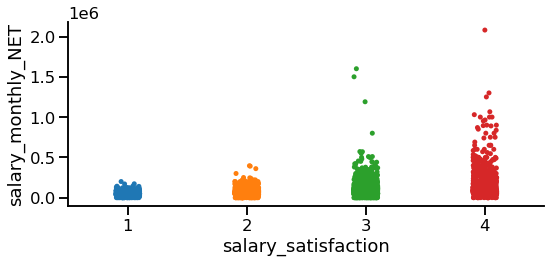

In [20]:
sns.catplot(data=df[df.profile_age < max_age],
            y='salary_monthly_NET',
            x='salary_satisfaction',
            height=4,
            aspect=2)